In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# load data and eliminate header
data = np.genfromtxt("applesOranges.csv", delimiter=',')[1:]

In [3]:
x = data[:, :2]
y = data[:, -1]

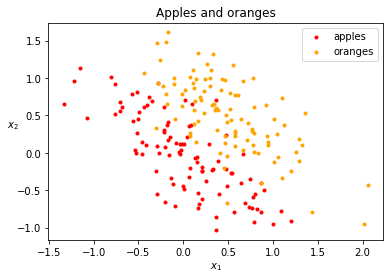

In [4]:
plt.scatter(x[y==0, 0], x[y==0, 1], c="red", marker='.', label="apples")
plt.scatter(x[y==1, 0], x[y==1, 1], c="orange", marker='.', label="oranges")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation='horizontal')
plt.title("Apples and oranges")
plt.legend()
plt.show()

In [5]:
gamma = np.linspace(0, np.pi, 19)
w = []
for i in gamma:
    w.append([np.cos(i), np.sin(i)])
bias = 0
w = np.array(w)

# append bias
xBias = np.vstack((np.ones((1,200)),x.T))
wBias = np.hstack((np.zeros((19, 1)), w))
h = wBias@xBias

# define prediction function
f = lambda h: 1 if h>=0 else 0

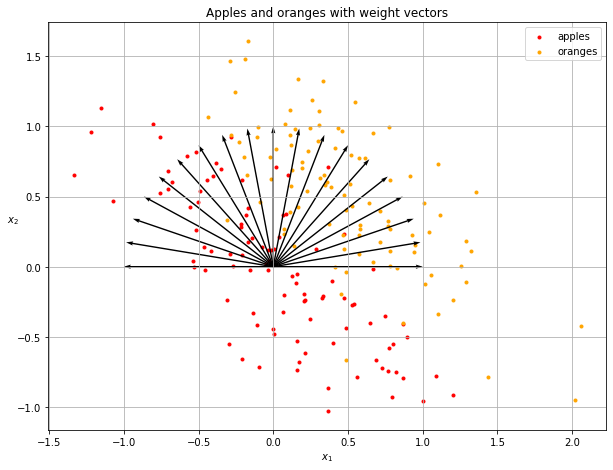

In [6]:
plt.figure(figsize=(10,7.5))
plt.scatter(x[y==0, 0], x[y==0, 1], c="red", marker='.', label="apples")
plt.scatter(x[y==1, 0], x[y==1, 1], c="orange", marker='.', label="oranges")
origin = np.zeros((2, 19))
plt.quiver(*origin, w[:, 0], w[:, 1], angles='xy', scale_units='xy', scale=1, width= 0.0025)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation='horizontal')
plt.title("Apples and oranges with weight vectors")
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# calculate prediction
p = [[f(h[i,j]) for j in range(0,200)] for i in range(0,19)]
p = np.array(p)

In [8]:
# determine % correct classifications of the corresponding neuron
performance = np.divide([np.sum(y==p[i]) for i in range(0,19)], 200)

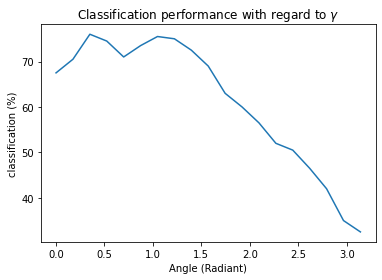

In [9]:
# plot a curve showing performance as function of gamma
plt.plot(gamma, performance*100)
plt.xlabel("Angle (Radiant)")
plt.ylabel("classification (%)")
plt.title("Classification performance with regard to $\gamma$")
plt.show()

In [10]:
# pick best weight vector
bestW = wBias[np.argmax(performance)]
print(f"The best weight vector is {bestW} at {math.degrees(gamma[np.argmax(performance)])} degrees with an accuracy of {np.max(performance)}")

The best weight vector is [0.         0.93969262 0.34202014] at 20.0 degrees with an accuracy of 0.76


In [11]:
# stack with different threshold values from range [-3,3]
threshold = np.linspace(-3,3, 100)
newW = np.row_stack([np.hstack((np.atleast_1d(threshold[i]), bestW[-2:]))] for i in range(0,threshold.size))

<ipython-input-11-a3ea12742dfb>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newW = np.row_stack([np.hstack((np.atleast_1d(threshold[i]), bestW[-2:]))] for i in range(0,threshold.size))


In [12]:
newH = newW@xBias


# calculate new prediction
newP = [[f(newH[i,j]) for j in range(0,200)] for i in range(0,threshold.size)]
newP = np.array(newP)

# determine % correct classifications of the corresponding neuron
newPerf = np.divide([np.sum(y==newP[i]) for i in range(0,threshold.size)], 200)

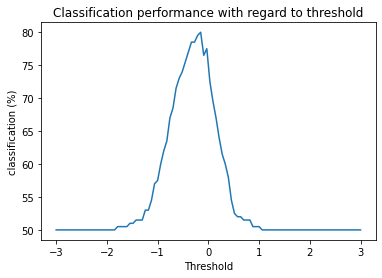

In [13]:
# plot a curve showing performance as function of gamma
plt.plot(threshold, newPerf*100)
plt.xlabel("Threshold")
plt.ylabel("classification (%)")
plt.title("Classification performance with regard to threshold")
plt.show()

In [14]:
# pick best threshold
veryBestW = newW[np.argmax(newPerf)]
bestThres = veryBestW[0]
print(f"The best threshold is {bestThres}")
print(f"The best weight vector is therefore {veryBestW} with an accuracy of {np.max(newPerf)}")

The best threshold is -0.15151515151515138
The best weight vector is therefore [-0.15151515  0.93969262  0.34202014] with an accuracy of 0.8


In [15]:
def perpendicular(a) :
    b = np.empty_like(a[-2:])
    b[0] = -a[2]
    b[1] = a[1]
    return b

def slope(points):
    x_coords, y_coords = zip(*points)
    m = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])
    return m

In [33]:
# calculate lines for plot
pts = [(0,0), (veryBestW[1], veryBestW[2])]
m = slope(pts)
weightVecLine = m*gamma + 0

hyperVec = perpendicular(veryBestW)
pts = [(0,0), (hyperVec[0], hyperVec[1])]
space = np.linspace(-1,1)
m = slope(pts)
hyperplaneZero = m*space + 0

hyperplaneThres = m*space + veryBestW[0]

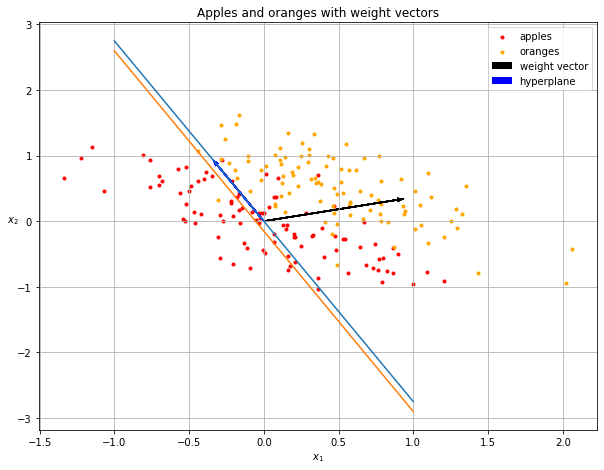

In [35]:
plt.figure(figsize=(10,7.5))
plt.scatter(x[y==0, 0], x[y==0, 1], c="red", marker='.', label="apples")
plt.scatter(x[y==1, 0], x[y==1, 1], c="orange", marker='.', label="oranges")
origin = np.zeros((2, 19))
plt.quiver(*origin, veryBestW[1], veryBestW[2], angles='xy', scale_units='xy', scale=1, width= 0.0025, label="weight vector")
plt.quiver(*origin, hyperVec[0], hyperVec[1], color='blue', angles='xy', scale_units='xy', scale=1, width= 0.0025, label="hyperplane")
plt.plot(space, hyperplane)
plt.plot(space, hyperplaneThres)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation='horizontal')
plt.title("Apples and oranges with weight vectors")
plt.grid(True)
plt.legend()
plt.show()

## Exercise H2.2: Multilayer Perceptron (MLP)

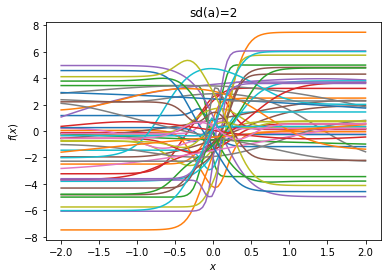

In [109]:
# set random seed for comparison
#np.random.seed(52)

# create 50 independent MLPs
mlp50 = np.zeros((50,3,10))
    
transfer = lambda h: np.tanh(h)
xSpace = np.linspace(-2, 2, 100)
output1 = np.zeros((50, xSpace.size))


for i in range(0,50):
    # w_21
    mlp50[i, 0] = np.random.normal(0, 1, 10)
    # w_10
    mlp50[i, 1] = np.random.normal(0, 2, 10)
    # b
    mlp50[i, 2] = np.random.uniform(-2, 2, 10)
    
    for j in range(0, xSpace.size):
        xVec = np.dot(np.ones((10)), xSpace[j])
        thisH = mlp50[i, 1]@xVec - mlp50[i, 2]
        thisP = [transfer(thisH[k]) for k in range(0,10)]
        thisP = np.array(thisP)
        output1[i, j] = np.dot(mlp50[i, 0], thisP)
    
for i in range(0,50):
    plt.plot(xSpace, output1[i])

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("sd(a)=2")
plt.show()

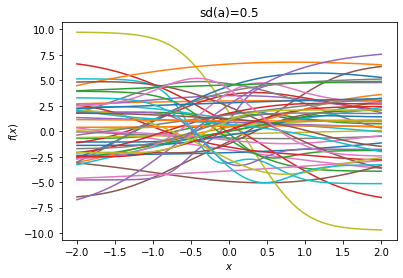

In [110]:
# create 50 independent MLPs
mlp50 = np.zeros((50,3,10))
    
transfer = lambda h: np.tanh(h)
xSpace = np.linspace(-2, 2, 100)
output2 = np.zeros((50, xSpace.size))


for i in range(0,50):
    mlp50[i, 0] = np.random.normal(0, 1, 10)
    mlp50[i, 1] = np.random.normal(0, 0.5, 10)
    mlp50[i, 2] = np.random.uniform(-2, 2, 10)
    
    for j in range(0, xSpace.size):
        xVec = np.dot(np.ones(10), xSpace[j])
        thisH = mlp50[i, 1]@xVec - mlp50[i, 2]
        thisP = [transfer(thisH[k]) for k in range(0,10)]
        thisP = np.array(thisP)
        output2[i, j] = np.dot(mlp50[i, 0], thisP)
    
for i in range(0,50):
    plt.plot(xSpace, output2[i])

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("sd(a)=0.5")
plt.show()

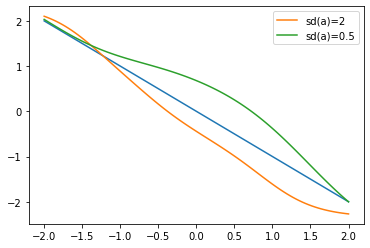

In [111]:
g = lambda x: -x

mse1 = np.zeros((50))

for i in range(0,50):
    mse1[i] = np.sum((g(xSpace) - output1[i])**2) / xSpace.size

mse2 = np.zeros(50)
for i in range(0,50):
    mse2[i] = np.sum((g(xSpace) - output2[i])**2) / xSpace.size

plt.plot(xSpace, g(xSpace))
plt.plot(xSpace, output1[np.argmin(mse1)], label="sd(a)=2")
plt.plot(xSpace, output2[np.argmin(mse2)], label="sd(a)=0.5")
plt.legend()
plt.show()